In [261]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science','ieee', "no-latex", "std-colors"])

def get_FDCM_data(path, csv_name):
    subdirs = [x for x in os.listdir(path) if 
               os.path.isdir(os.path.join(path, x)) and not x.startswith(".")]

    if "slices" in subdirs:
        subdirs.remove("slices")
    
    scan_points = []
    dihedrals = []
    closes = []
    mids = []
    fars = []
    totals = []
    paths = []
    rmsd_atoms = []
    rmsd_charges = []
    
    tmp_dict = {}

    for x in subdirs:
        #  list files in the subdir
        files = os.listdir(os.path.join(path, x))
        local = [x for x in files if x.startswith("local")]
#         print(local)
        #  read the charges in their local axes
        local_file = open(os.path.join(path, x, local[-1])).readlines()
        n_lines = int(local_file[0])
        charges = local_file[2:n_lines+2]
        charges = np.array([ [float(x.split()[1]),
                  float(x.split()[2]),
                  float(x.split()[3]),
                  float(x.split()[4])] for x in charges])
        
        for i, axis in enumerate(["x", "y", "z"]):
            for c in range(n_lines):
                if f"{axis}_c{c}" not in tmp_dict.keys():
                    tmp_dict[f"{axis}_c{c}"] = []
                tmp_dict[f"{axis}_c{c}"].append(charges[c,i])
        
        scan_points.append(x)
        paths.append(os.path.join(path, x))
        #  read the ARS log file
        ars_lines = open(os.path.join(path, x, "ARS.log")).readlines()
        rmsd_atoms.append(float(ars_lines[0].split()[-1]))
        rmsd_charges.append(float(ars_lines[1].split()[-1]))
        dihedrals.append(float(ars_lines[2].split()[-1]))
        #  read the analysis log file
        analysis_lines = open(os.path.join(path, x, "analysis.log")).readlines()
        
        totals.append(float(analysis_lines[-5].split()[-3]))
        closes.append(float(analysis_lines[-4].split()[-3]))
        mids.append(float(analysis_lines[-3].split()[-3]))
        fars.append(float(analysis_lines[-2].split()[-3]))
        
    df_dict = {"scan_point": scan_points, "dihedral": dihedrals, "close_range": closes, 
              "mid_range": mids, "far_range": fars, "total": totals,  
              "rmsd_atoms": rmsd_atoms, "rmsd_charges": rmsd_charges, "path": paths}
    df_dict.update(tmp_dict)
    df = pd.DataFrame(df_dict)
    df.to_csv("/home/unibas/boittier/FDCM/data_csv/"+csv_name, index=False)    
    df = df.sort_values("dihedral")
    
    return df    
    
def plot_fit_dataframe(df):
    plt.grid(which="both")
    plt.plot(df["dihedral"], df["total"], "-", label="Total")        
    plt.plot(df["dihedral"], df["close_range"], "-", label="1.20 < $r$ < 1.66") 
    plt.plot(df["dihedral"], df["mid_range"], "-", label="1.66 < $r$ < 2.20") 
    plt.plot(df["dihedral"], df["far_range"], "-", label="2.20 < $r$") 
    plt.legend()
    plt.ylabel("ESP Error (kcal mol$^{-1}$ $e^{-1}$)")
    plt.xlabel("$\Phi~(^{\circ})  $")
    plt.ylim(0, 10)
    plt.xlim(-180,180)
    


In [264]:
df_f0 = get_FDCM_data("../models/fbuta-f_0", "fbuta-f0.csv")
# df_f10 = get_FDCM_data("../fbuta-f_10", "fbuta-f10.csv")

# df_c0 = get_FDCM_data("../fbuta-c_0", "fbuta-c0.csv")
#df_c1 = get_FDCM_data("../fbuta-c_1", "fbuta-c1.csv")
# df_c10 = get_FDCM_data("../fbuta-c_10", "fbuta-c10.csv")

# df_t_c0 = get_FDCM_data("../t-fbuta-c_0", "t-fbuta-c0.csv")
# df_t_c10 = get_FDCM_data("../t-fbuta-c_10", "t-fbuta-c10.csv")



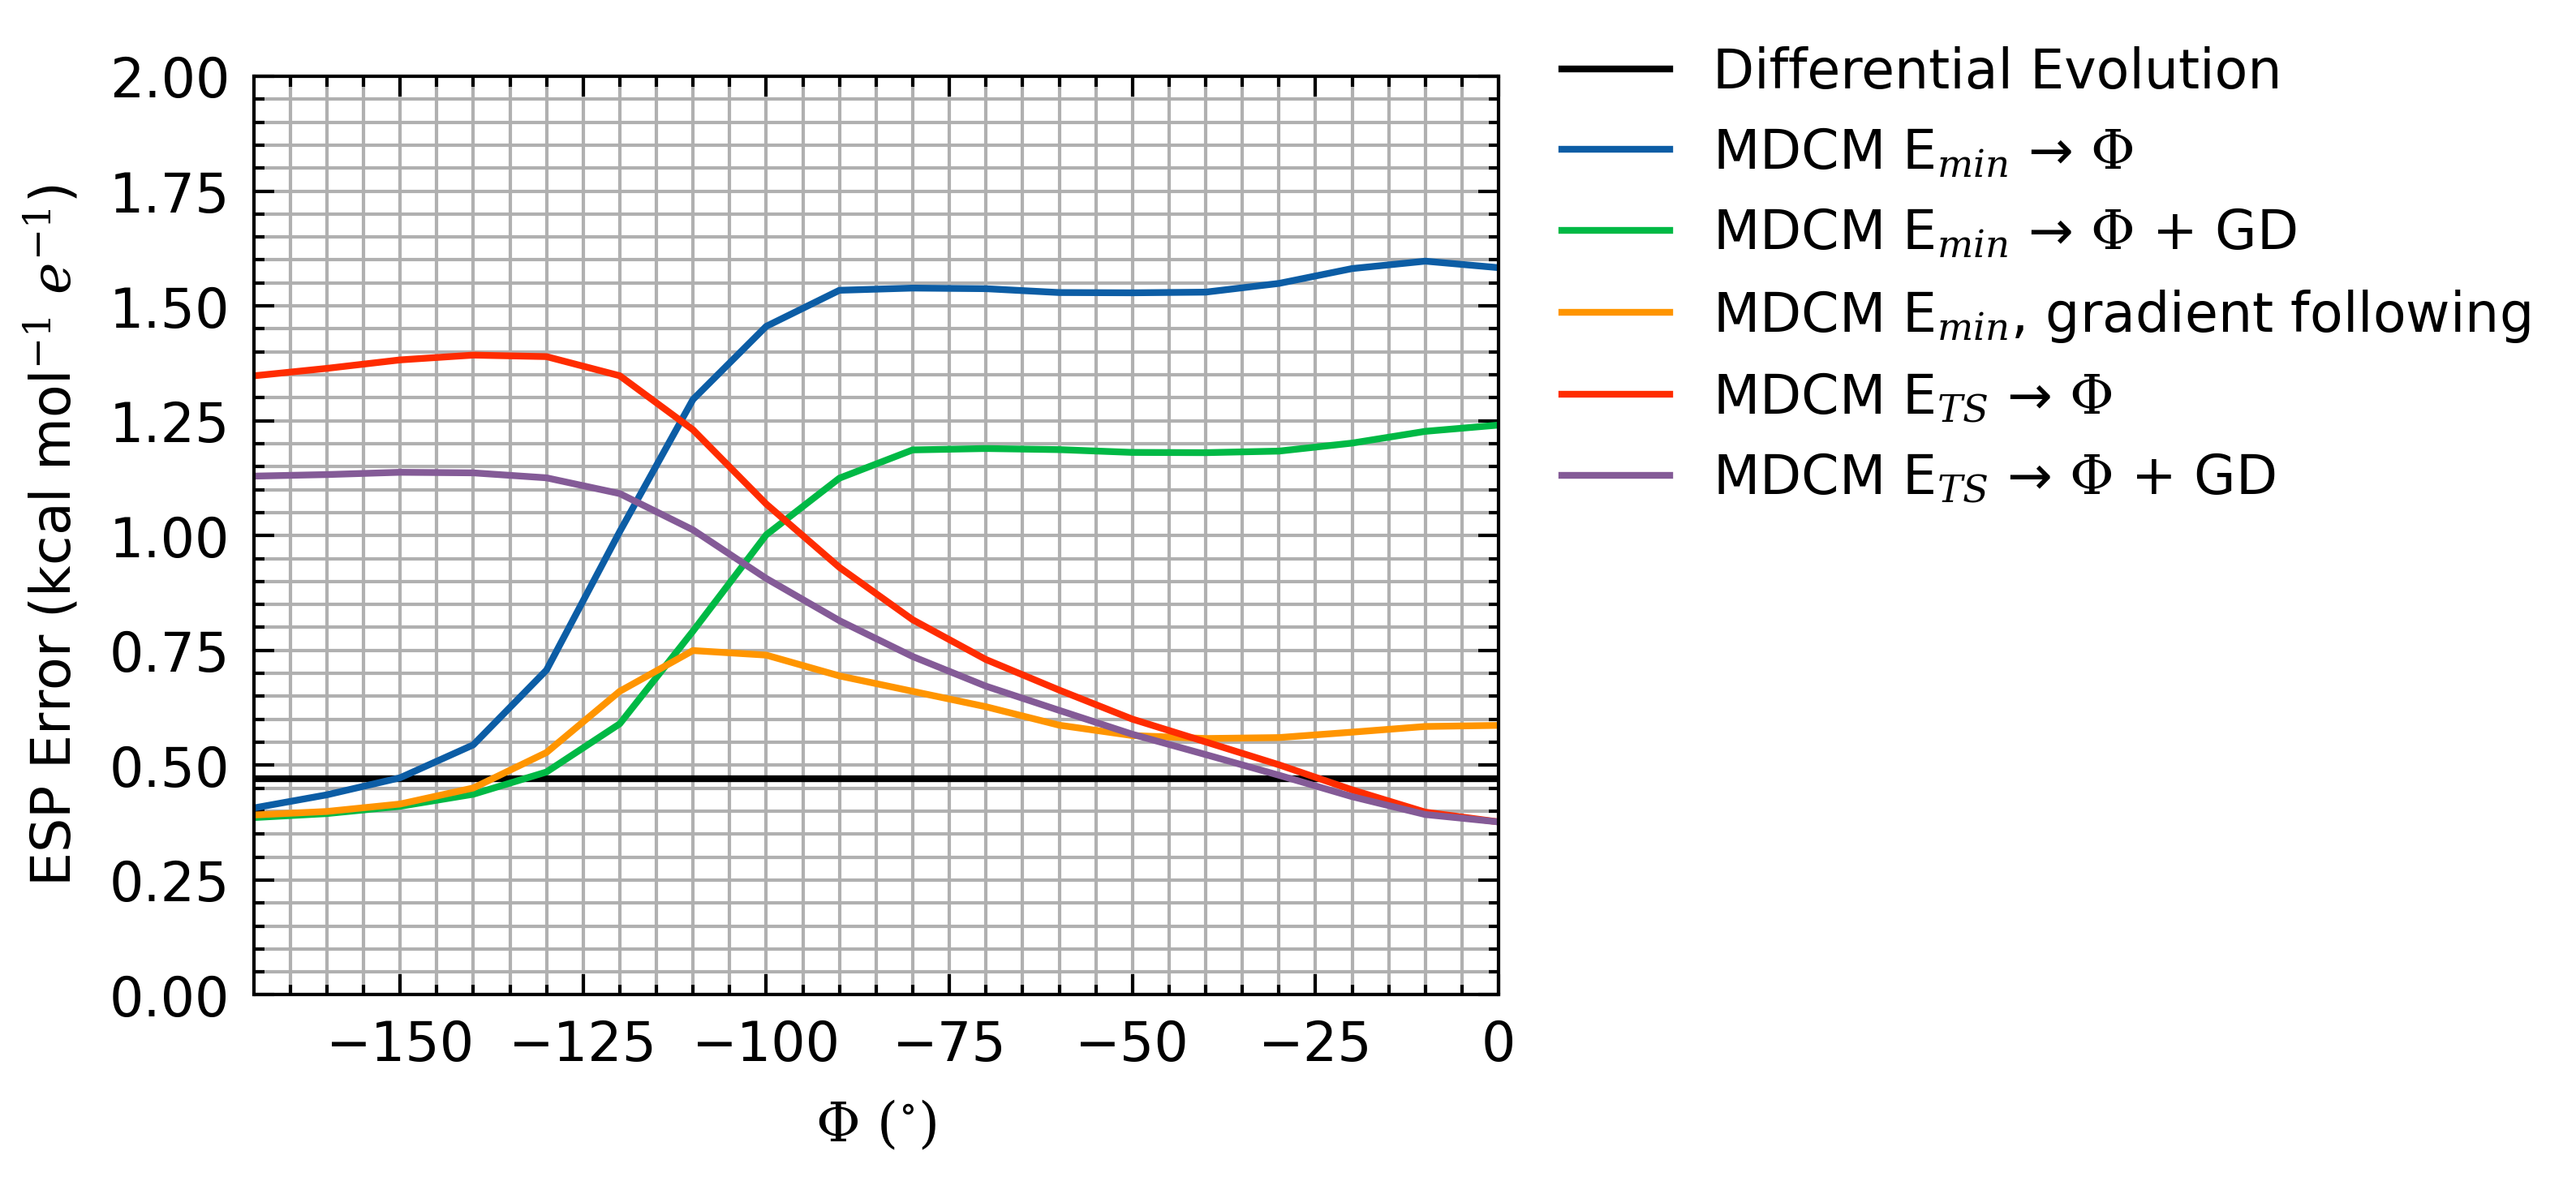

In [243]:
key = "total"
plt.grid(which="both")
plt.axhline(0.47, c="k", label="Differential Evolution")
plt.plot(df_f0["dihedral"], df_f0[key], "-", label="MDCM E$_{min}$ → $\Phi$")     
plt.plot(df_c10["dihedral"], df_c10[key], "-", label="MDCM E$_{min}$ → $\Phi$ + GD")  
plt.plot(df_f10["dihedral"], df_f10[key], "-", label="MDCM E$_{min}$, gradient following") 
plt.plot(df_t_c0["dihedral"], df_t_c0[key], "-", label="MDCM E$_{TS}$ → $\Phi$")   
plt.plot(df_t_c10["dihedral"], df_t_c10[key], "-", label="MDCM E$_{TS}$ → $\Phi$ + GD")
plt.ylabel("ESP Error (kcal mol$^{-1}$ $e^{-1}$)")
plt.xlabel("$\Phi~(^{\circ})  $")
plt.ylim(0, 2)
plt.xlim(-170,0)

#plt.axhline(0.49, c="k") #label="Differential Evolution")

plt.legend(bbox_to_anchor=(1.0115, 0.48))


plt.savefig("summary.png")



#  0.49  # 0.48 # 0.48




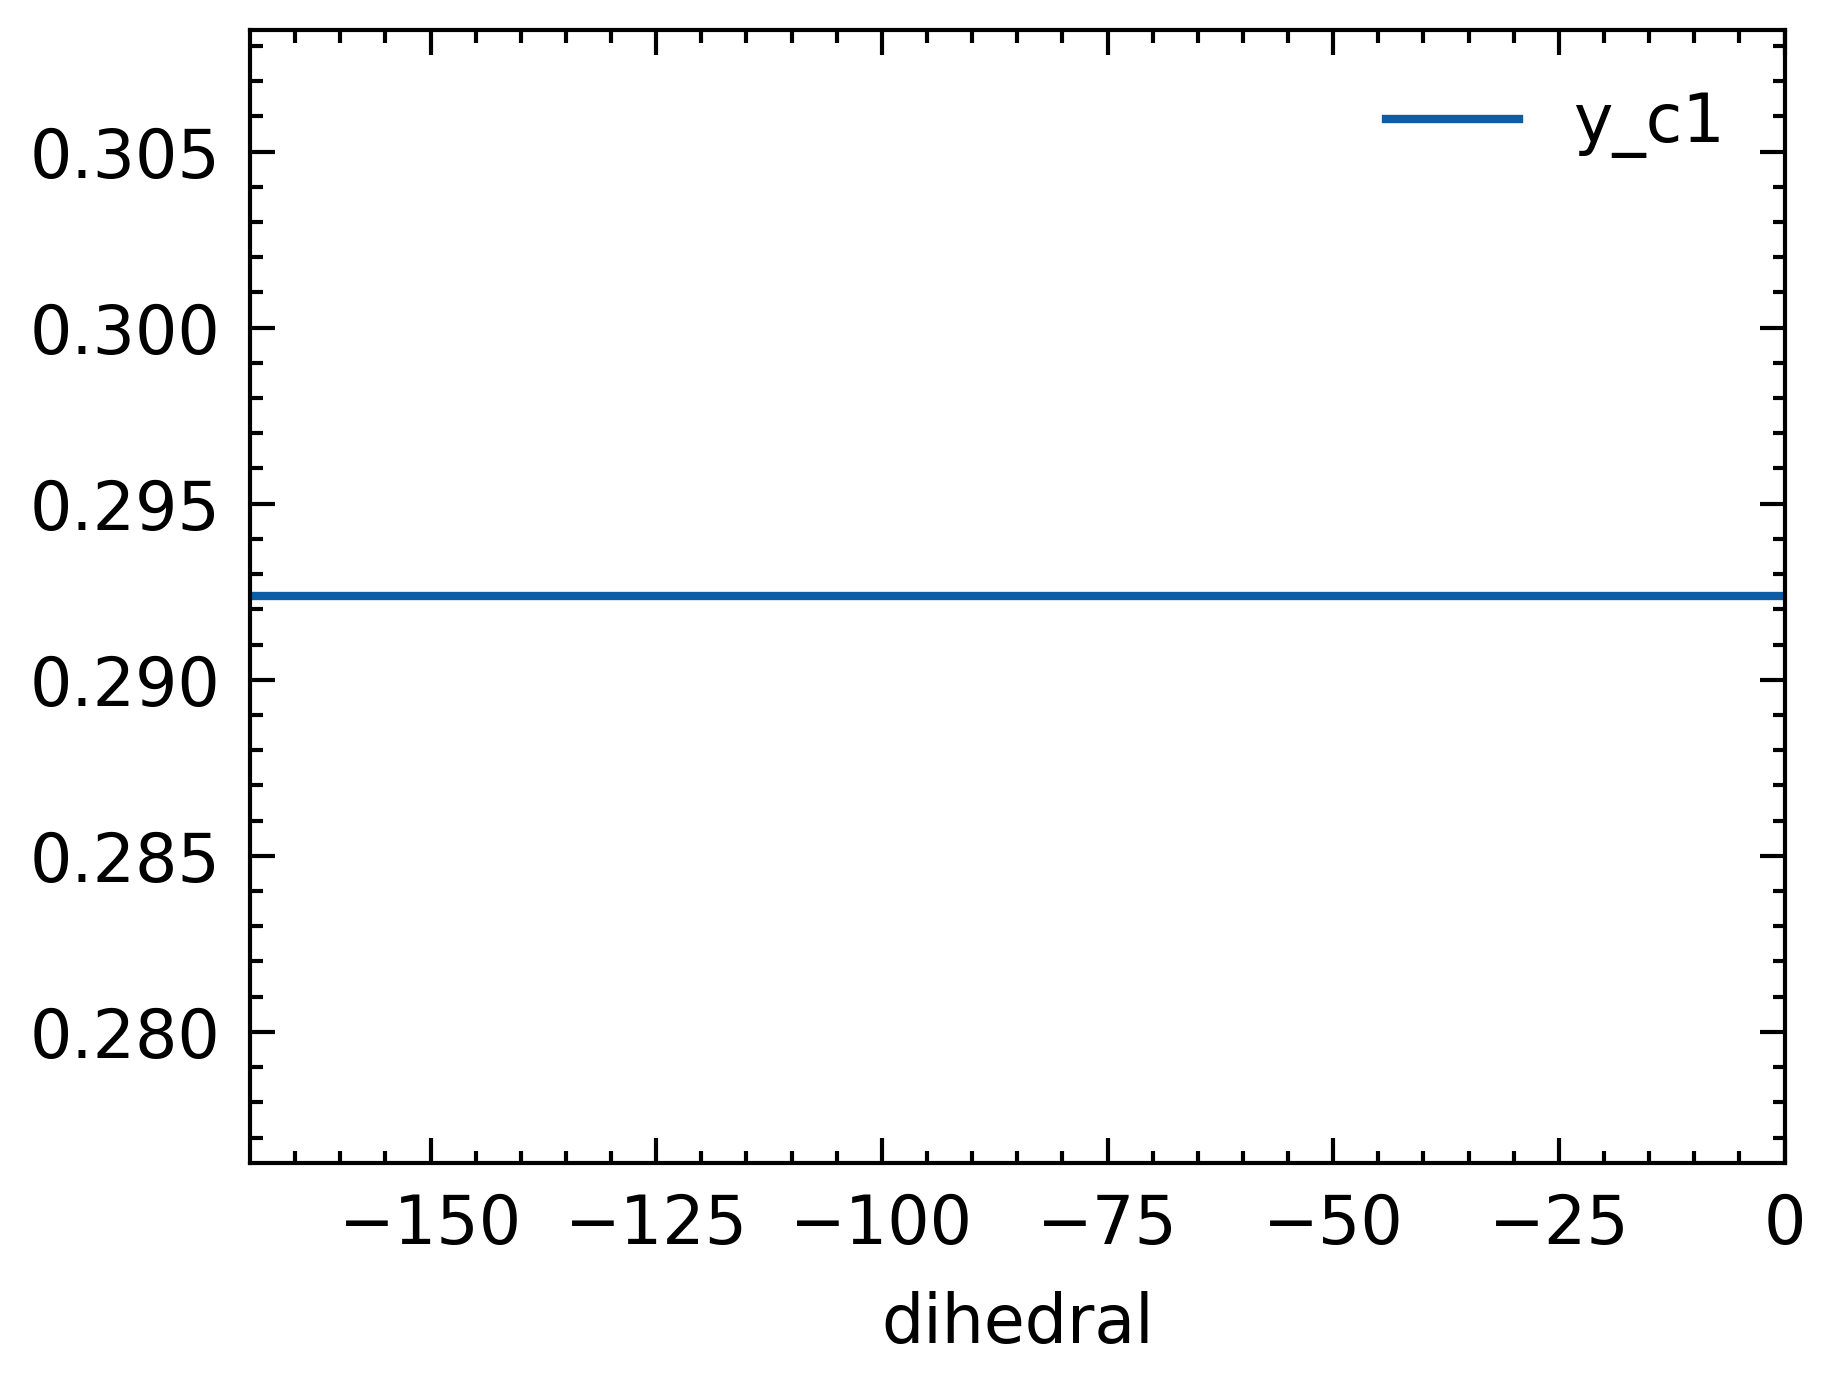

In [265]:
key = "y_c1"
# df_f0.plot("dihedral", key)
# plt.xlim(-170,0)
# plt.show()
df_c0.plot("dihedral", key)
plt.xlim(-170,0)
plt.show()
# df_c1.plot("dihedral", key)
# plt.xlim(-170,0)
# plt.show()

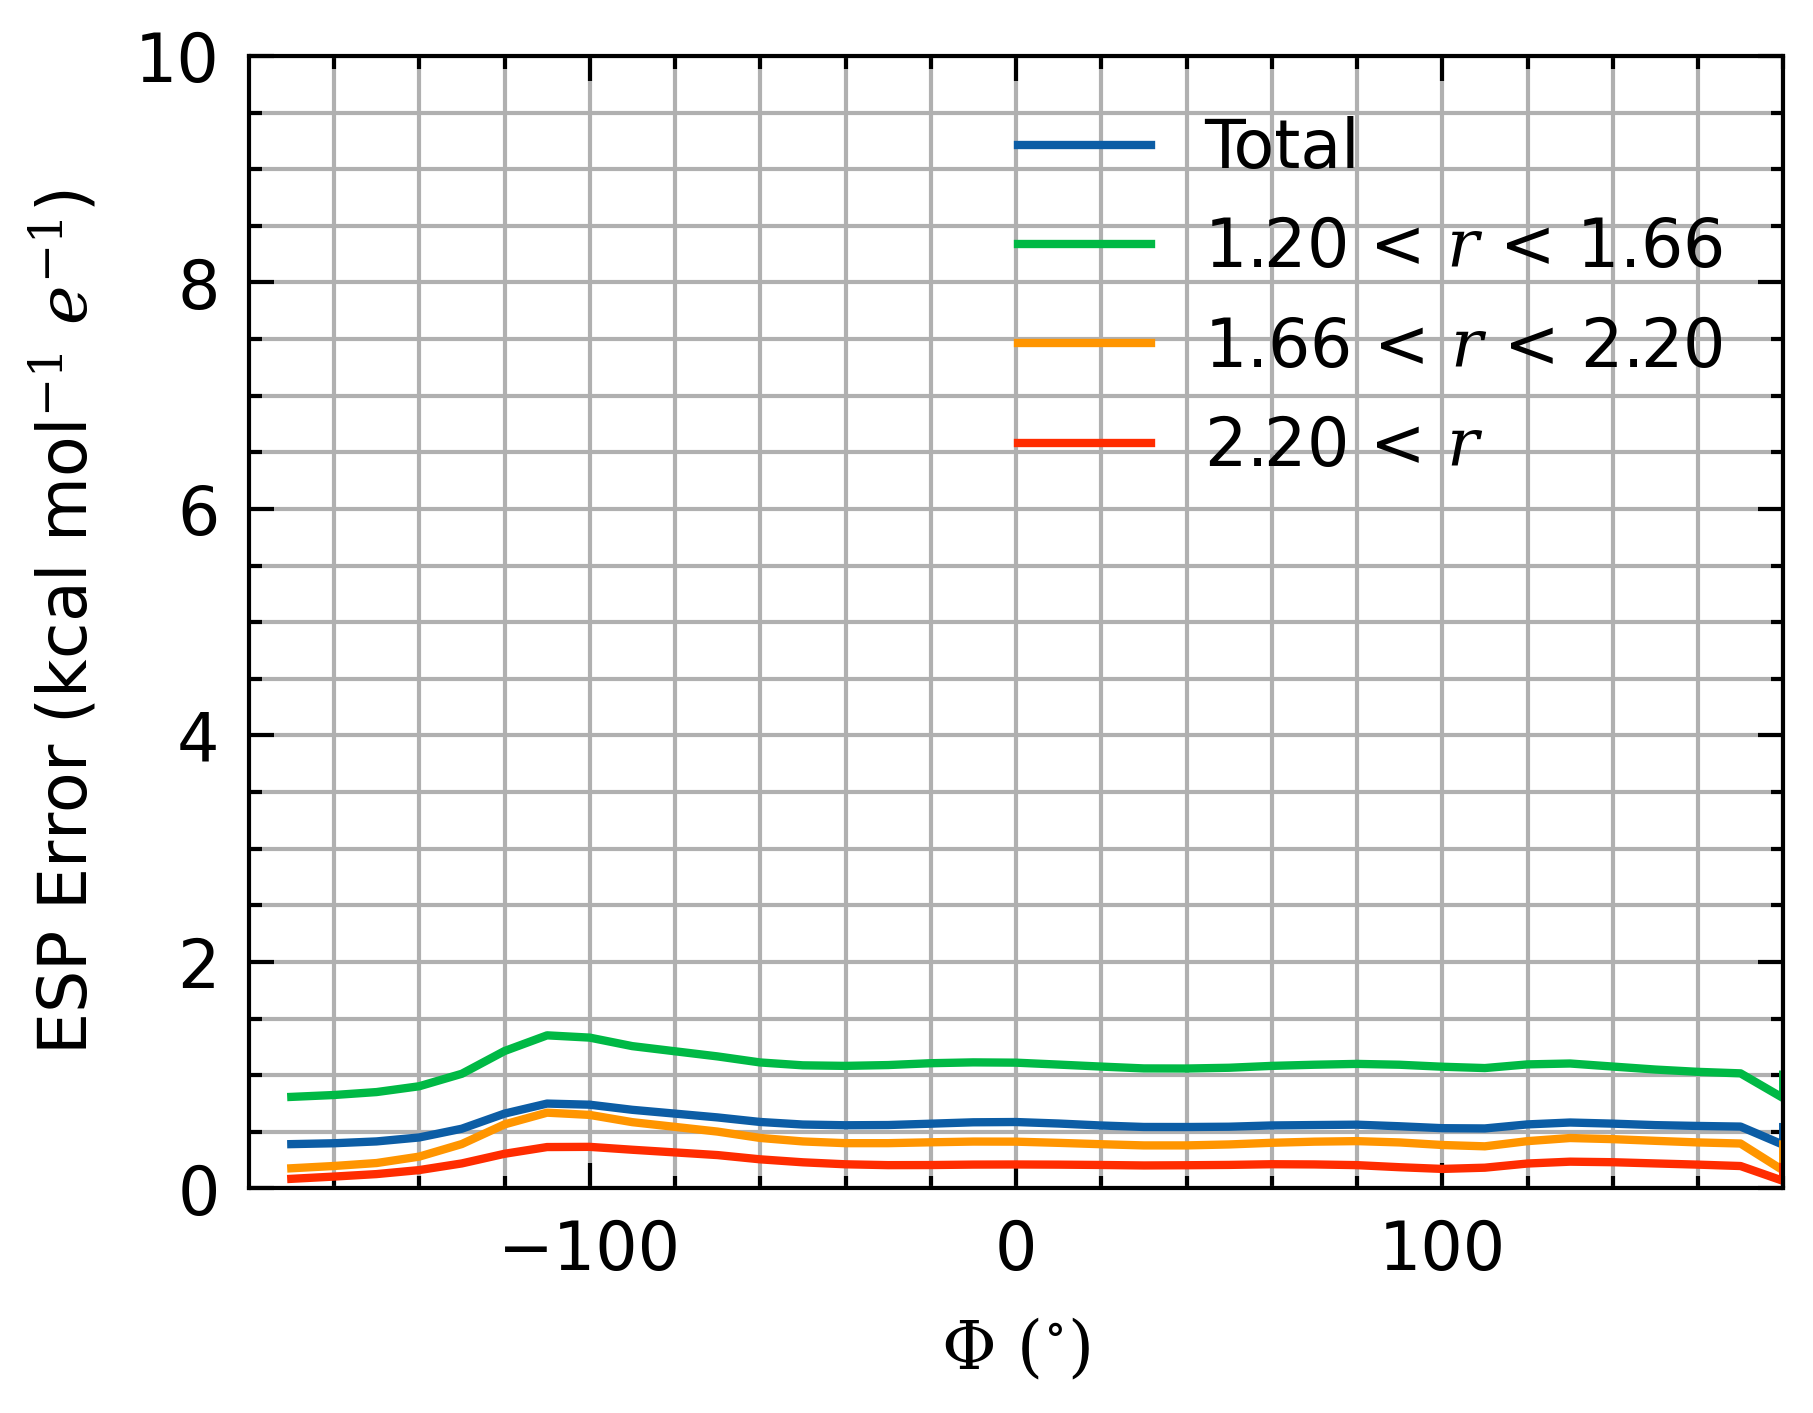

In [149]:
plot_fit_dataframe(df_f10)
plt.savefig("fbuta_f10.png")


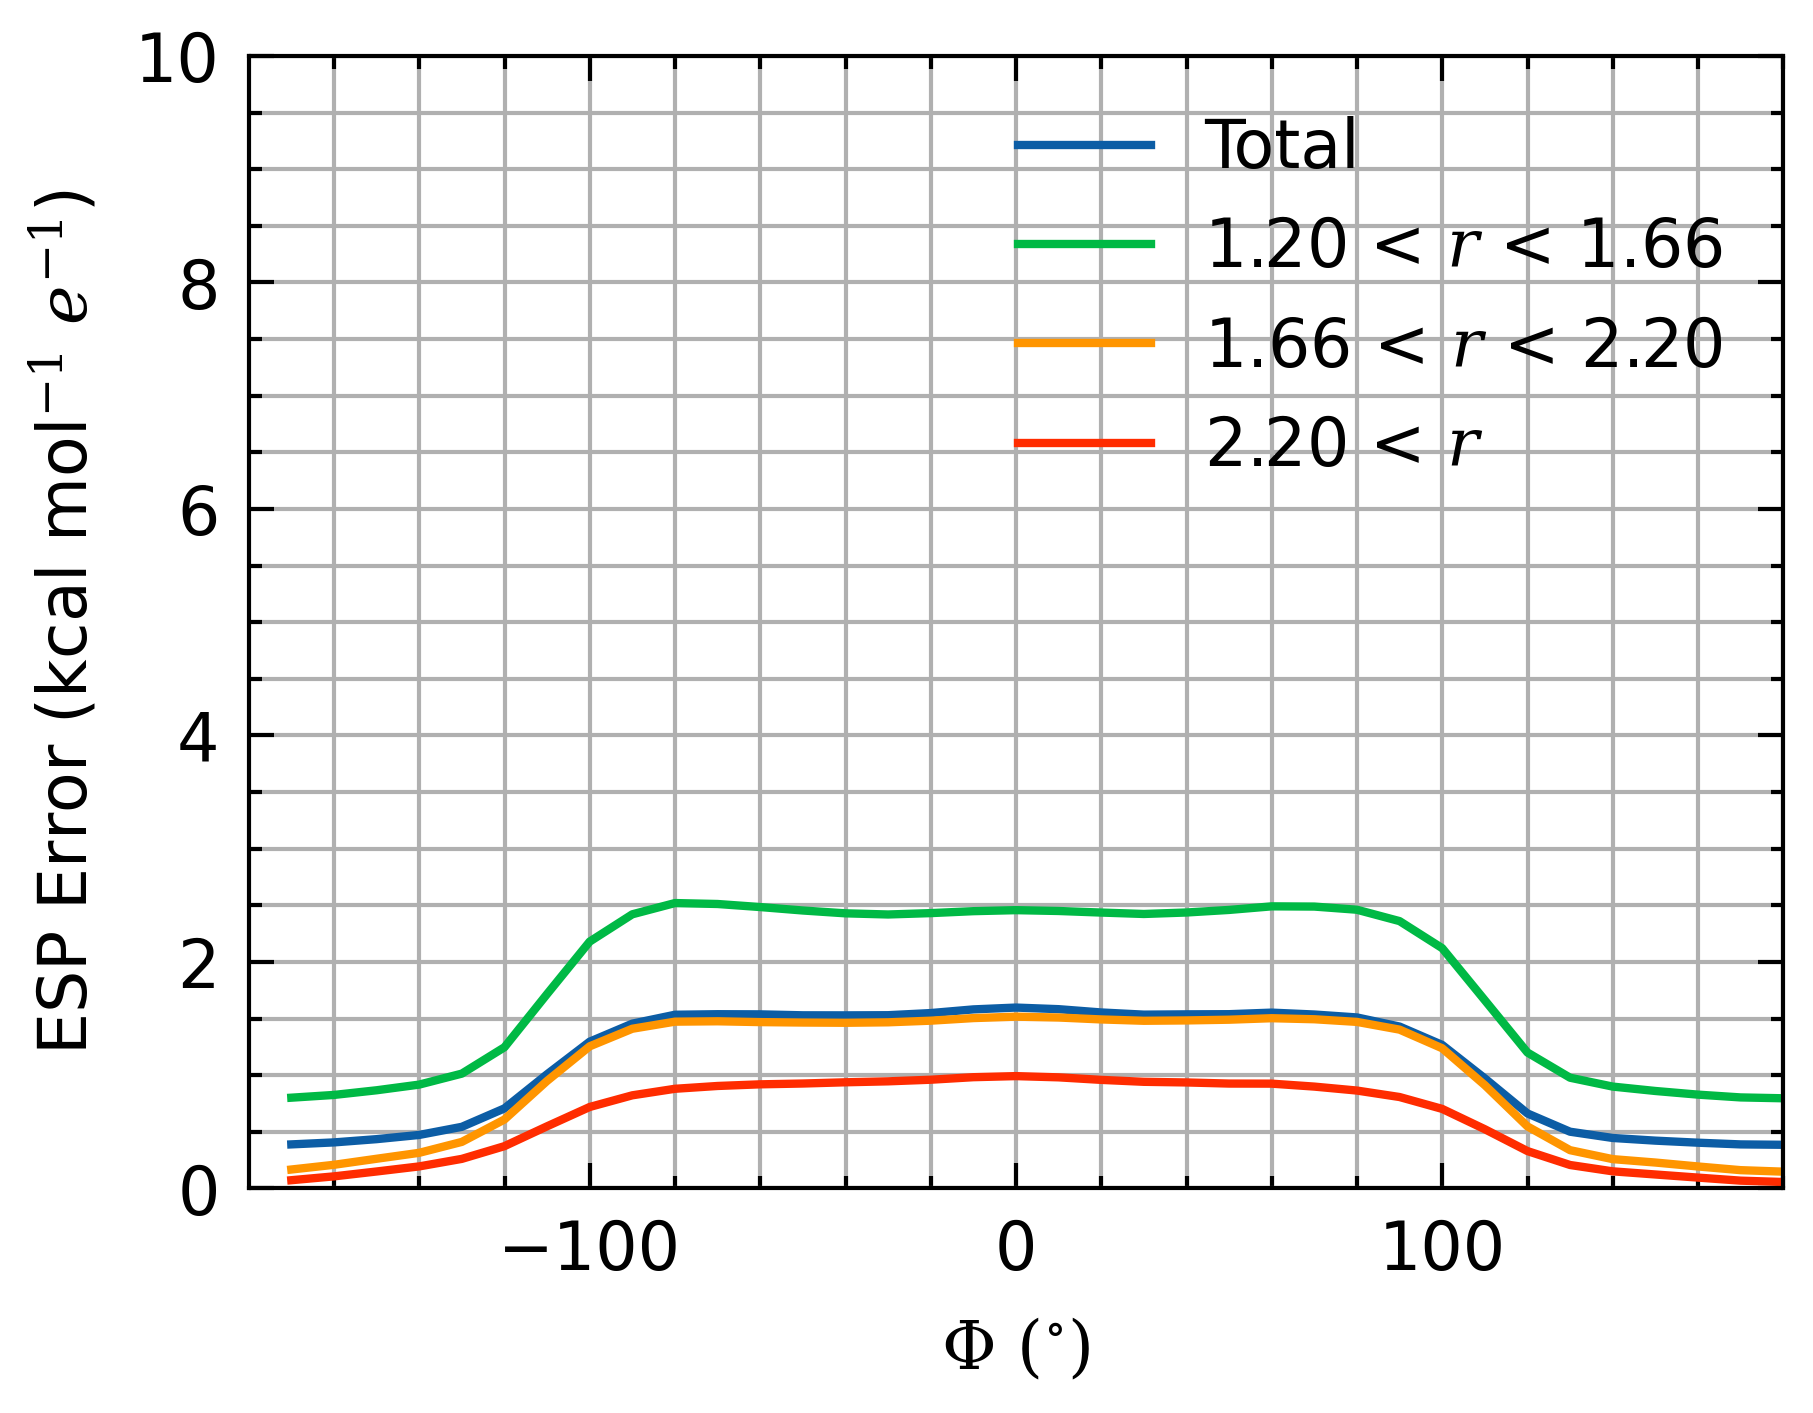

In [134]:
plot_fit_dataframe(df_c0)
plt.savefig("fbuta_c0.png")

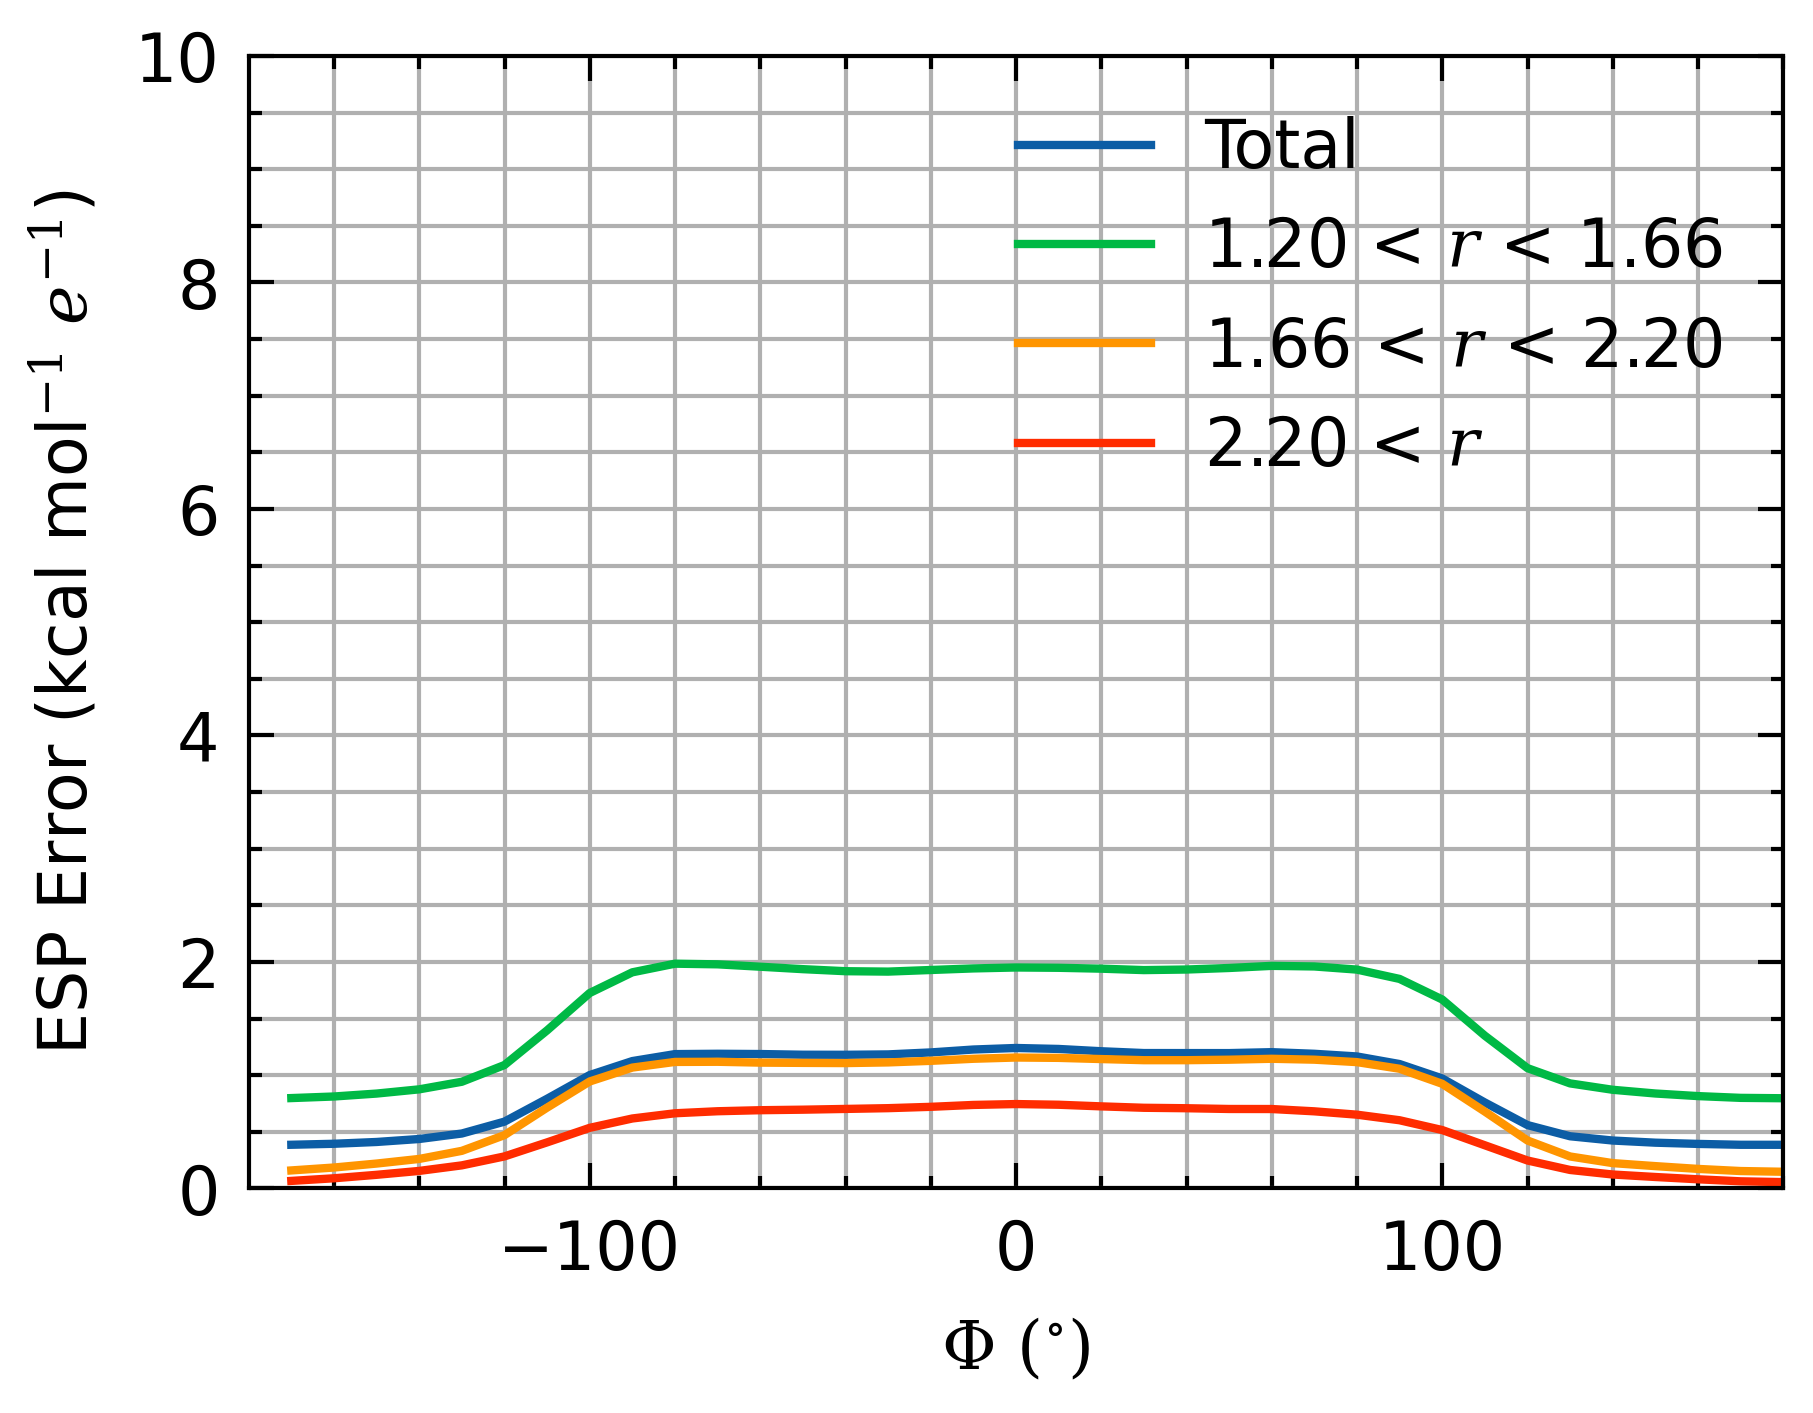

In [135]:
plot_fit_dataframe(df_c10)
plt.savefig("fbuta_c10.png")

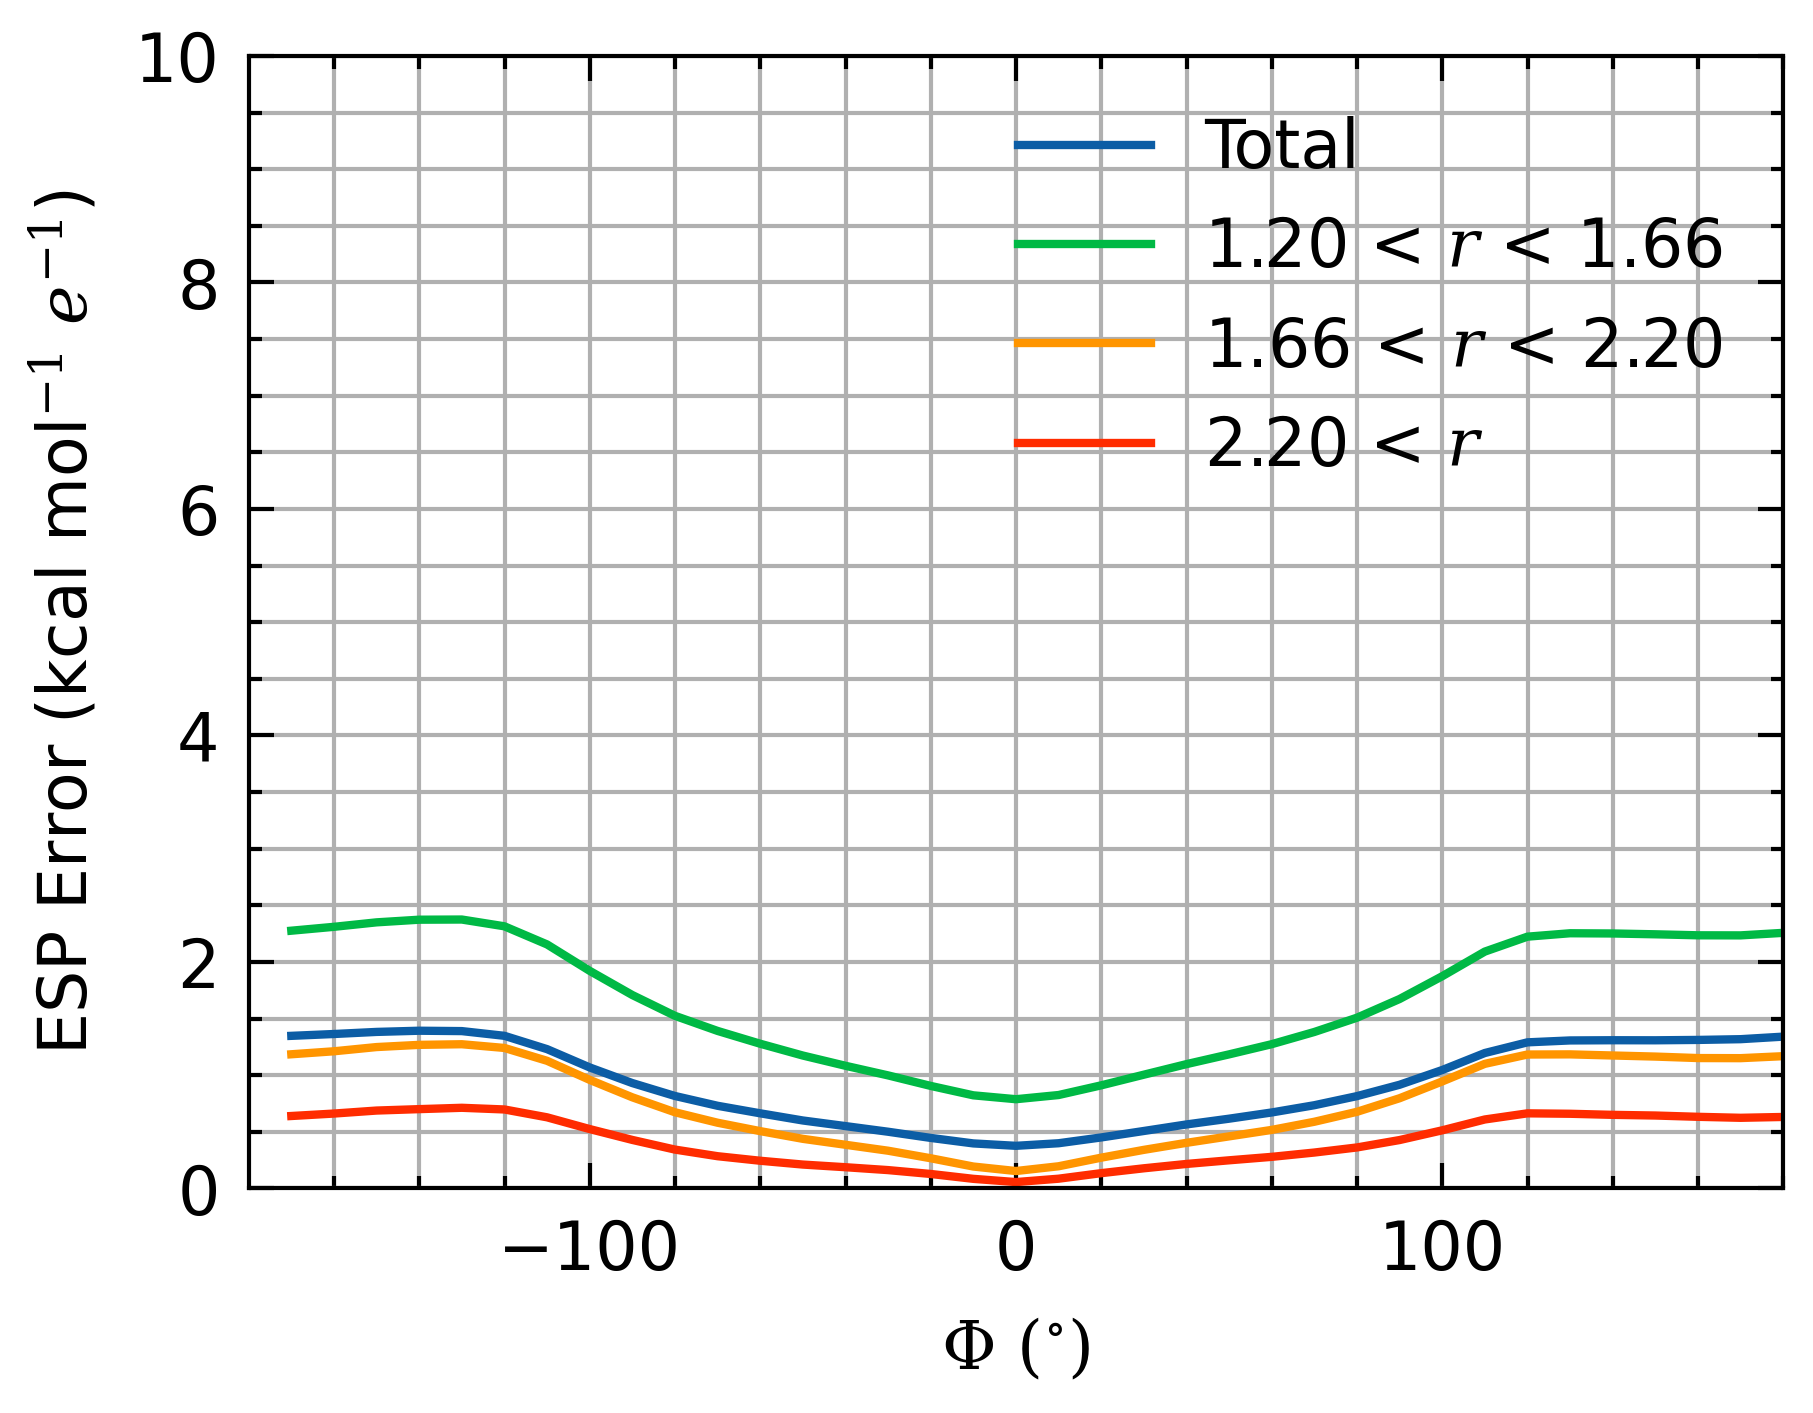

In [136]:
plot_dataframe(df_t_c0)
plt.savefig("fbuta_t0.png")

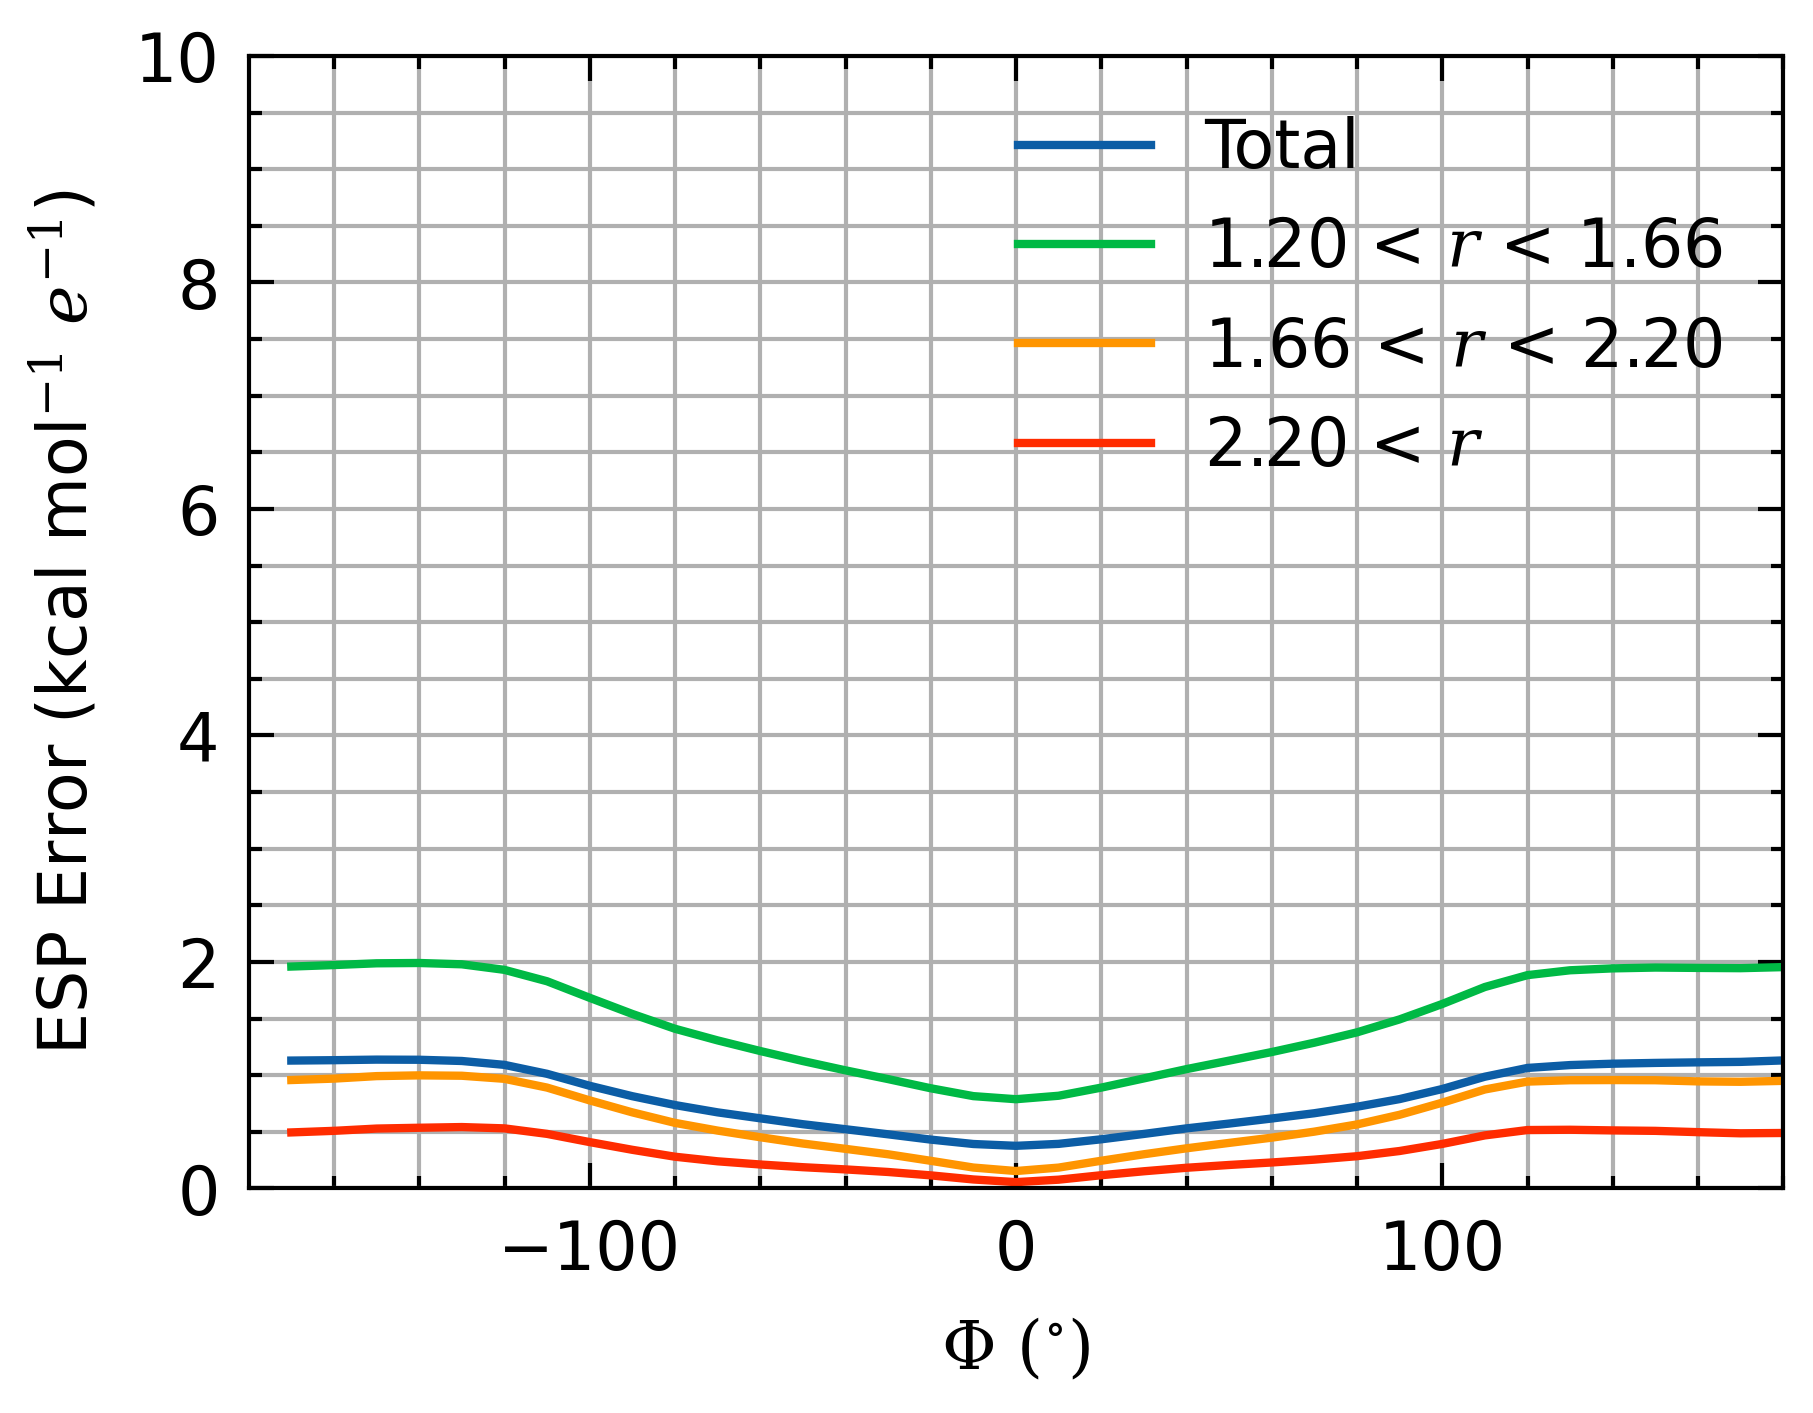

In [139]:
plot_dataframe(df_t_c10)
plt.savefig("fbuta_t10.png")